In [1]:
import numpy as np
import os
from PIL import Image
from torchvision import transforms
print ( os.getcwd() )

# change_working_directory = os.path.join(os.getcwd(), 'system')
os.chdir("/home/lpala/fedgfe/system")

from datautils.node_dataset import NodeData
from utils.image_utils import plot_image

from datautils.jsrtparser.jsrt import Jsrt, JsrtImage

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.ToTensor()
])

class Argument():
    def __init__(self):
        self.dataset = None
        self.num_classes = 0
        self.device = None

/home/lpala/fedgfe/notebook


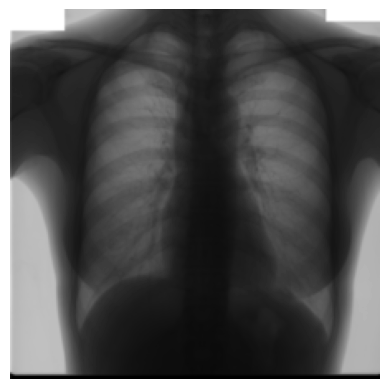

../dataset/JSRT/SemanticSegmentation/label/case125_label.png
Mask file found


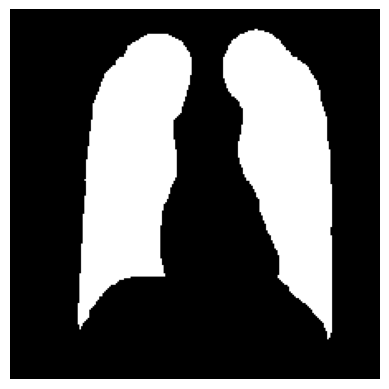

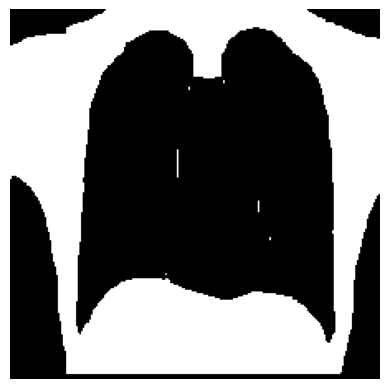

KeyboardInterrupt: 

In [2]:
import re
from pathlib import Path
import torch

jsrt_path = '../dataset/JSRT'
semantic_segmentation_labels_path = jsrt_path + "/SemanticSegmentation/label"
semantic_segmentation_image_path = jsrt_path + "/SemanticSegmentation/org"


jsrt_data = Jsrt()
jsrt_data.load_images(images_path=jsrt_path)

for image in jsrt_data._has_nodule_image_list:

    image_tensor = np.array(image.image)
    image_tensor = torch.from_numpy(image_tensor / 4095)

    image_tensor = transform(image_tensor.unsqueeze(0))

    plot_image(image_tensor[0])

    file_path = Path(image.image_path)
    image_index = re.search(r'\d+', file_path.name).group()
    segmentation_mask_file = semantic_segmentation_labels_path + "/case" + image_index + "_label.png"
    segmentation_image_file = semantic_segmentation_image_path + "/case" + image_index + ".bmp"

    if os.path.exists(segmentation_mask_file):
        print (segmentation_mask_file)
        print ("Mask file found")

        # Cuore 85
        # Polmone 255
        # Esterno campo polmonare 170
        # Esterno corpo 0
        colors = [255, 170, 85, 0]

        mask = Image.open(segmentation_mask_file)
        mask_tensor = np.array(mask)
        orginal_mask_tensor = mask_tensor
        mask_tensor = torch.from_numpy(mask_tensor).unsqueeze(0).repeat(4,1,1)
        mask_tensor = transform(mask_tensor)
        for i in range(mask_tensor.shape[0]):
            if colors[i] == 0:
                mask_tensor[i] = torch.logical_not(mask_tensor[i])
            else:
                mask_tensor[i] *= (mask_tensor[i] == colors[i])
            plot_image(mask_tensor[i])
        plot_image(orginal_mask_tensor)
    # if  os.path.exists(segmentation_image_file):
    #     print (segmentation_image_file)
    #     print ("Image file found")
    #     image = Image.open(segmentation_image_file)
    #     image_tensor = np.array(image)
    #     image_tensor = transform(image_tensor)
    #     plot_image(image_tensor)
    print (image_index)


dataset = 'JSRT-1C'
dataset_folder = '../dataset/' + dataset

if not os.path.exists(dataset_folder):
    print('Dataset not found')
    exit(1)

train_dir = dataset_folder + '/train'
test_dir = dataset_folder + '/test'

train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

def load_data(file):
    images = []
    masks = []
    image = np.load(file)

    return image
batch_size = 64
for train_file in train_files:
    file = train_dir + "/" + train_file
    # args = []
    args = Argument()
    args.dataset = dataset
    node_dataset = NodeData( args, id=0)
    tl = node_dataset.load_train_data( batch_size, dataset_dir_prefix='../' )
    for sample in tl:
        images = sample[0]
        labels = sample[1]
        for batch in range(len(images)):
            image = images[batch]
            C, H, W = image.shape
            image.expand(3, H, W)
            print(f"image shape: {image.shape} label {labels[batch]}")
            plot_image(image[0])
        break


    break
